In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import os, sys

Here we transform our raw light curve files from the University of Washington Catalog into 224x224 pixel numpy images.  These are fed into the convolutional neural network.

In [ ]:
# create folder to save images

root_folder = "../../data/numpy_images/" 
if not os.path.exists(root_folder):
    os.mkdir(root_folder)
    
# load light curve data    

path = '../../data/QSO_S82/'
files = os.listdir(path)

### Read Light curve file

for file_name in files:

    with open(path + file_name,'r') as f:
        next(f) # skip first row
        df = pd.DataFrame(l.rstrip().split() for l in f)

    ### convert str into numeric
    
    for i in range(14):
        df[i] = pd.to_numeric(df[i], errors='ignore')

    ### clean up anomalies for different bands
    
    df_u = df[(30>df[1]) & (df[1]>1)]
    df_g = df[(30>df[4]) & (df[4]>1)]
    df_r = df[(30>df[7]) & (df[7]>1)]
    df_i = df[(30>df[10]) & (df[10]>1)]
    df_z = df[(30>df[13]) & (df[13]>1)]

    df = df[(30>df[1]) & (df[1]>1)]
    df = df[(30>df[4]) & (df[4]>1)]
    df = df[(30>df[7]) & (df[7]>1)]
    df = df[(30>df[10]) & (df[10]>1)]
    df = df[(30>df[13]) & (df[13]>1)]

    ### generating data
    Images = np.zeros((5, 3340)) # blank image
    
    # fill 5 channels
    try:
        u_data = round(df[0]) - round(df[0].iloc[0]) 
        g_data = round(df[3]) - round(df[0].iloc[0])
        r_data = round(df[6]) - round(df[0].iloc[0])
        i_data = round(df[9]) - round(df[0].iloc[0])
        z_data = round(df[12]) - round(df[0].iloc[0])

        for i, day in enumerate(u_data):
            Images[0, int(day)] = 0
            Images[0, int(day)] += df[1].iloc[i]

        for i, day in enumerate(g_data):
            Images[1, int(day)] = 0
            Images[1, int(day)] += df[4].iloc[i]

        for i, day in enumerate(r_data):
            Images[2, int(day)] = 0
            Images[2, int(day)] += df[7].iloc[i]

        for i, day in enumerate(i_data):
            Images[3, int(day)] = 0
            Images[3, int(day)] += df[10].iloc[i]

        for i, day in enumerate(z_data):
            Images[4, int(day)] = 0
            Images[4, int(day)] += df[13].iloc[i]
   
    except:
        print("failed data, file:", file_name) # for exceptions
        pass

    Images = np.clip(Images, 0, None) # remove anomalies (ugriz < 0)  

    reshape_img = Images.reshape(167, 100)   # reshape image into 167X100

    # padding zeros to make the 167X100 -> 224X224

    Padding_images = np.zeros((224, 224))

    Padding_images[:167, :100] = reshape_img
    
    np.save(root_folder + "LC_images_{}.npy".format(file_name), Padding_images)

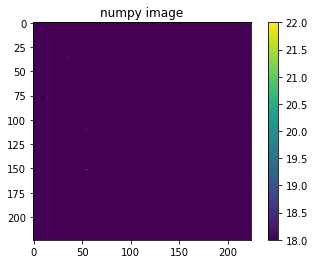

In [9]:
plt.imshow(Padding_images)
plt.title("numpy image")
plt.clim(18,22)
plt.colorbar()
plt.show()

All information from the associated light curve is encoded in these 2D numpy images.  Amongst the authors, we refer to these as the "morse code" images.